In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def linearize_diff_eq(f, x, u, t, x0, u0, t0): # функция для линеаризациия (пояснение смотреть в readme.md)
    x_sym = sp.symbols('x')
    u_sym = sp.symbols('u')
    t_sym = sp.symbols('t')
    
    f0 = f.subs([(x, x0), (u, u0), (t, t0)])
    A = sp.diff(f, x).subs([(x, x0), (u, u0), (t, t0)])
    B = sp.diff(f, u).subs([(x, x0), (u, u0), (t, t0)])
    
    dxdt_approx = f0 + A * (x_sym - x0) + B * (u_sym - u0)
    
    return dxdt_approx

Символьное решение:  -(u - 1)*sin(1) + (x - 1)*cos(1) + cos(1) + sin(1)


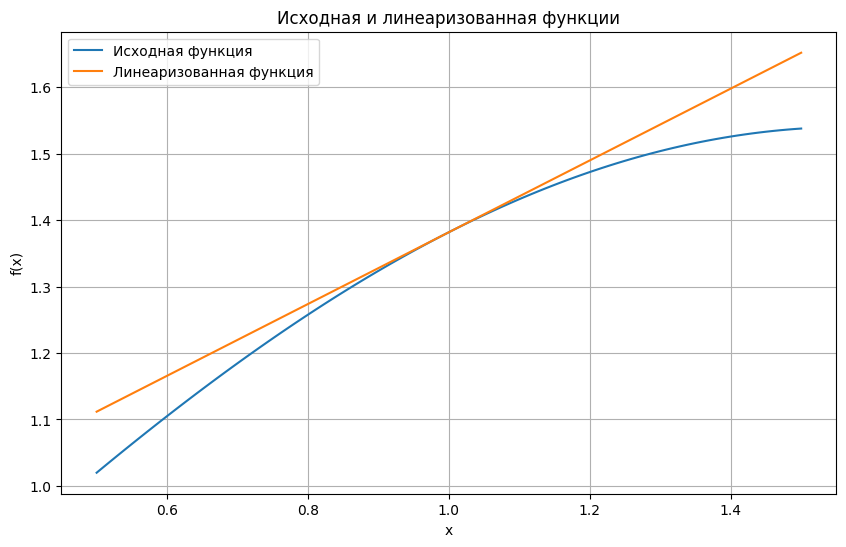

In [57]:

x, u, t = sp.symbols('x u t')
f = sp.sin(x) + sp.cos(u) * t**2


x0 = 1
u0 = 1
t0 = 1
dx = 0.5
# линеаризируем
linearized_eq = linearize_diff_eq(f, x, u, t, x0, u0, t0)

print("Символьное решение: ", linearized_eq)

# из символьного выражения делаем функцию
f_func = sp.lambdify(x, f.subs([(u, u0), (t, t0)]), 'numpy')
linearized_func = sp.lambdify(x, linearized_eq.subs([(u, u0), (t, t0)]), 'numpy')

x_values = np.linspace(x0 - dx, x0 + dx, 100)
f_values = f_func(x_values)
linearized_values = linearized_func(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, f_values, label='Исходная функция')
plt.plot(x_values, linearized_values, label='Линеаризованная функция')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Исходная и линеаризованная функции')
plt.legend()
plt.grid(True)
plt.show()

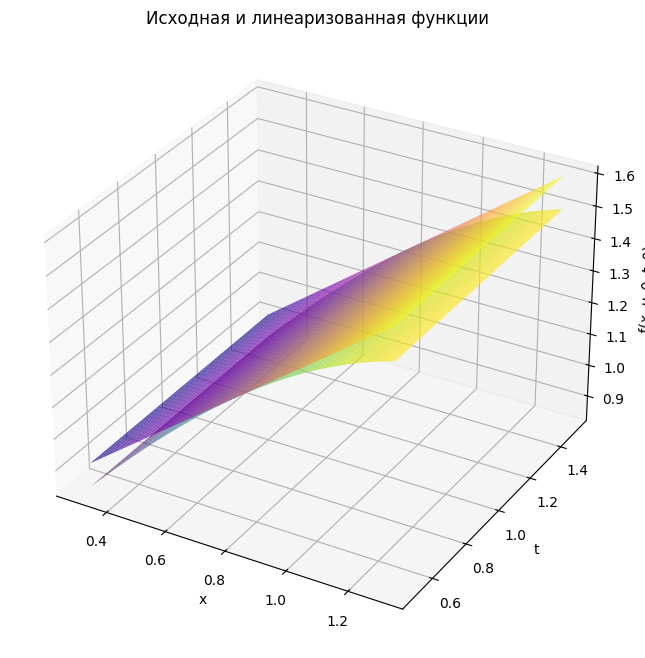

In [58]:
x, u, t = sp.symbols('x u t')
# f = x**2*u + u**2*t - x*t
f = sp.sin(x) + sp.cos(u) * t**2

x0 = 0.8
u0 = 1
t0 = 1
dx = 0.5
linearized_eq = linearize_diff_eq(f, x, u, t, x0, u0, t0)
# u_0 будет фиксированной
f_func = sp.lambdify([x, t], f.subs([(u, u0), (t, t0)]), 'numpy')
linearized_func = sp.lambdify([x, t], linearized_eq.subs([(u, u0), (t, t0)]), 'numpy')

x_values = np.linspace(x0 - dx, x0 + dx, 100) # задаем диапазон значений для x и t
t_values = np.linspace(t0 - dx, t0 + dx, 100)

# сетка значений для x и t
X, T = np.meshgrid(x_values, t_values)
F_values = f_func(X, T)
Linearized_values = linearized_func(X, T)

# fig = plt.figure(figsize=(20, 20))

# ax = fig.add_subplot(2, 2, 1, projection='3d')
# ax.plot_surface(X, T, F_values, cmap='viridis')
# ax.set_xlabel('x')
# ax.set_ylabel('t')
# ax.set_zlabel('f(x, u_0, t_0)')
# ax.set_title('Исходная функция')

# ax = fig.add_subplot(2, 2, 2, projection='3d')
# ax.plot_surface(X, T, Linearized_values, cmap='viridis')
# ax.set_xlabel('x')
# ax.set_ylabel('t')
# ax.set_zlabel('f(x, u_0, t_0)')
# ax.set_title('Линеаризованная функция')

# plt.tight_layout()
# plt.show()

fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, T, F_values, cmap='viridis', alpha=0.7, label='Исходная функция')
ax.plot_surface(X, T, Linearized_values, cmap='plasma', alpha=0.7, label='Линеаризованная функция')

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('f(x, u_0, t_0)')
ax.set_title('Исходная и линеаризованная функции')

# original_patch = mpatches.Patch(color='red', label='Исходная функция', alpha=0.7)
# linearized_patch = mpatches.Patch(color='blue', label='Линеаризованная функция', alpha=0.7)
# ax.legend(handles=[original_patch, linearized_patch])

plt.show()

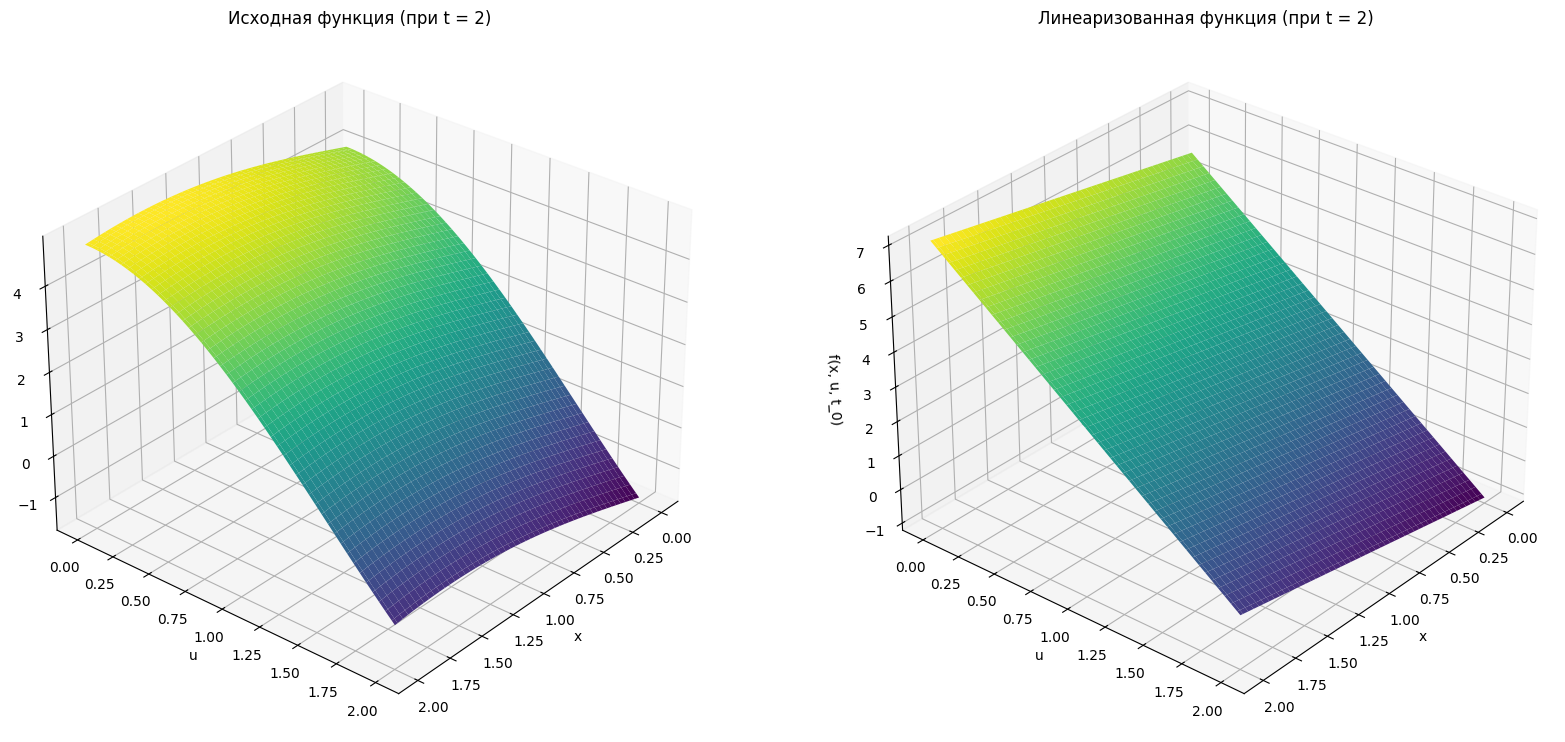

In [62]:
# проверка из разряда "а что если..." при фиксированном t
fig = plt.figure(figsize=(20, 20))

t_fixed = t0

# диапазоны переменных для x и u
x_values = np.linspace(0, 2, 100)
u_values = np.linspace(0, 2, 100)

# делаем то же самое, что и в блоке выше, только меняем значения для фиксированного t_0
f_func_t_fixed = sp.lambdify([x, u], f.subs([(t, t_fixed)]), 'numpy')
linearized_func_t_fixed = sp.lambdify([x, u], linearized_eq.subs([(t, t_fixed)]), 'numpy')

X, U = np.meshgrid(x_values, u_values)

F_values_t_fixed = f_func_t_fixed(X, U)
Linearized_values_t_fixed = linearized_func_t_fixed(X, U)

ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot_surface(X, U, F_values_t_fixed, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.set_zlabel('f(x, u, t_0)')
ax.set_title('Исходная функция (при t = {})'.format(t_fixed))
ax.view_init(elev=30, azim=40)

ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.plot_surface(X, U, Linearized_values_t_fixed, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.set_zlabel('f(x, u, t_0)')
ax.set_title('Линеаризованная функция (при t = {})'.format(t_fixed))
ax.view_init(elev=30, azim=40)


# plt.tight_layout()
plt.show()


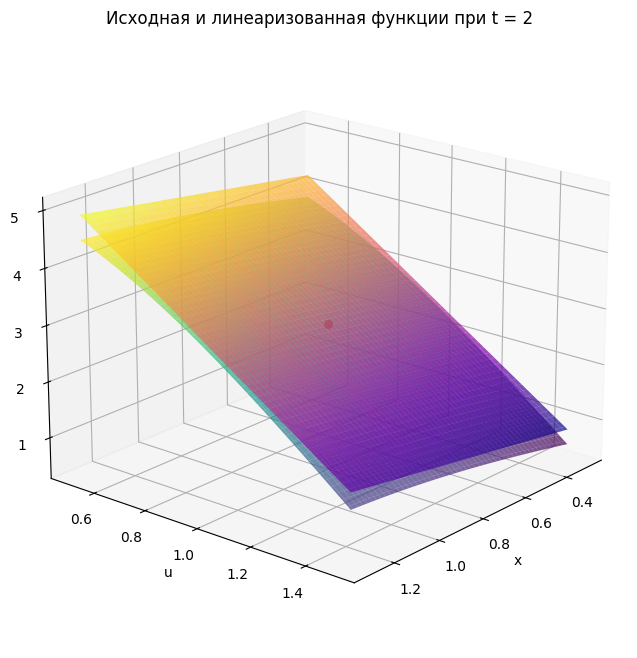

In [69]:
x, u, t = sp.symbols('x u t')
f = sp.sin(x) + sp.cos(u) * t**2

x0 = 0.8
u0 = 1
t0 = 2
dx = 0.5

linearized_eq = linearize_diff_eq(f, x, u, t, x0, u0, t0)

t_fixed = t0
f_func_t_fixed = sp.lambdify([x, u], f.subs(t, t_fixed), 'numpy')
linearized_func_t_fixed = sp.lambdify([x, u], linearized_eq.subs(t, t_fixed), 'numpy')

x_values = np.linspace(x0 - dx, x0 + dx, 100)
u_values = np.linspace(u0 - dx, u0 + dx, 100)

X, U = np.meshgrid(x_values, u_values)
F_values_t_fixed = f_func_t_fixed(X, U)
Linearized_values_t_fixed = linearized_func_t_fixed(X, U)

fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, U, F_values_t_fixed, cmap='viridis', alpha=0.7, label='Исходная функция')
ax.plot_surface(X, U, Linearized_values_t_fixed, cmap='plasma', alpha=0.7, label='Линеаризованная функция')

ax.scatter(x0, u0, f_func_t_fixed(x0, u0), color='red', s=30, label='Точка линеаризации', depthshade=True)

ax.set_xlabel('x')
ax.set_ylabel('u')
ax.set_zlabel('f(x, u, t_0)')
ax.set_title(f'Исходная и линеаризованная функции при t = {t_fixed}')
ax.view_init(elev=20, azim=40)

plt.show()